In [16]:
%reload_ext autoreload
%autoreload 2

In [17]:
from cereeberus import ReebGraph, MapperGraph, Interleave
import cereeberus.data.ex_mappergraphs as ex_mg

import matplotlib.pyplot as plt
import numpy as np
import time

import pulp #for ILP optimization

import cereeberus.distance.ilp as ilp # import the ilp file


# Example Mappers

Text(0.5, 1.0, 'G')

/Users/ishikaghosh/anaconda3/envs/interleavingenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 127 () missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/ishikaghosh/anaconda3/envs/interleavingenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/ishikaghosh/anaconda3/envs/interleavingenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/ishikaghosh/anaconda3/envs/interleavingenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/ishikaghosh/anaconda3/envs/interleavingenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/ishikaghosh/anaconda3/envs

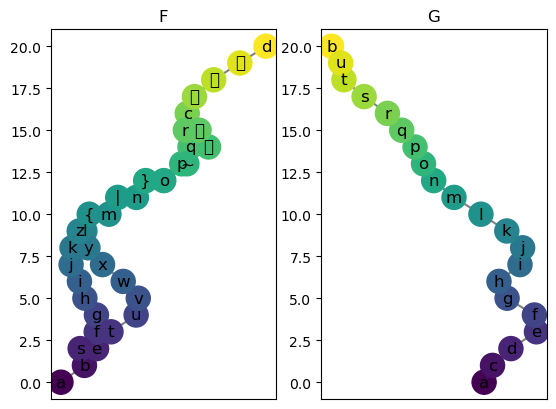

In [18]:
F = ex_mg.torus(0, 1, 16, 20, delta = 1, seed = 30)
G = ex_mg.line(0, 20)
plt.figure()
plt.subplot(121)
F.draw()
plt.title('F')
plt.subplot(122)
G.draw()
plt.title('G')

# Create interleaving

In [19]:
myInt = Interleave(F, G, n = 3, initialize_random_maps=True, seed = 5)

# loss before optimization
print('loss before optimization: ', myInt.loss())

loss before optimization:  4.0


# Run optimization for differnet solvers 
## Note the result and the time 

In [20]:
solvers = ['CBC', 'GUROBI', 'GLPK']

results = {}
for i in range(3):
    start = time.time()
    # optimize the interleave
    ilp_result = ilp.solve_ilp(myInt, solver = solvers[i])
    end = time.time()
    results[solvers[i]] = {'loss': ilp_result[1], 'time': end-start, 'status': ilp_result[2]}

In [21]:
print(results)

{'CBC': {'loss': 1.0, 'time': 0.11699414253234863, 'status': 'Optimal'}, 'GUROBI': {'loss': 1.0, 'time': 0.08032798767089844, 'status': 'Optimal'}, 'GLPK': {'loss': 1, 'time': 0.06806826591491699, 'status': 'Optimal'}}
